# 공격력/마력 확률 문제

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [Statistics]

## 문제 설정

`-` 공격력 직업으로 공격력 2줄 옵션(12% / 9%)을 획득할 때까지 에디셔널 잠재 능력을 재설정하는 상황을 가정하자

`-` 옵션을 재설정하다보면 공격력 2줄이 등장하기 전에 마력 2줄이 등장하는 경우를 쉽게 볼 수 있다

`-` 누군가는 공격력 직업으로 옵션을 재설정할 경우 공격력보다 마력이 등장할 확률이 더 높다고 체감할 수 있다

`-` 여기서 가설은 `공격력 직업으로 옵션을 재설정할 경우 공격력 2줄보다 마력 2줄이 등장할 확률이 더 높다` 이다

`-` 이것이 진짜인지 확인하는 방법은 간단한데 공격력 직업으로 에디셔널 잠재 능력을 수많이 재설정하면 된다

`-` 이를 혼자 진행하는 것은 어려우니 여러 명에게 데이터를 받아 진행할 수도 있다

`-` 만약, 데이터를 받을 사람을 미리 무작위로 정하는 것이 아닌 아무나에게 데이터를 받는다면 해당 데이터가 편향될 가능성이 높다

`-` 대개, 데이터를 제출하는 사람은 해당 가설이 참이라고 느낀 사람이 많을 것이다

`-` 반대로 공격력 2줄 옵션을 마력 2줄 옵션보다 먼저 획득한 사람은 해당 가설이 거짓이라고 생각하며 굳이 데이터를 제출하진 않을 것이다 (가설이 거짓임을 체감했기 때문)

`-` 그러면 수집된 데이터에는 마력 2줄 옵션이 공격력 2줄보다 많이 포함되고 이는 가설이 참이라는 결론을 도출하게 된다

`-` 무작위로 수집된 데이터라면 공격력 2줄이 등장할 확률과 마력 2줄이 등장할 확률은 같다

`-` 이에 대해 보충 설명을 하면 다음과 같다

`-` $n$명의 사람들에 대해 공격력 2줄 옵션이 나올 때까지 큐브를 사용한다고 가정하자

`-` 이 중 평균적으로 $\frac{n}{2}$명은 공격력 2줄 옵션이 먼저 나왔을 것이며 나머지 $\frac{n}{2}$명은 마력 2줄 옵션이 먼저 나왔을 것이다

`-` 여기서, `공격력 등장 횟수 = 마력 등장 횟수 = n / 2`이다

`-` 마력 2줄 옵션이 먼저 나온 $\frac{n}{2}$명은 공격력 2줄 옵션을 얻을 때까지 큐브를 사용한다

`-` 그러면 $\frac{n}{2}$명 중 평균적으로 $\frac{n}{4}$명은 공격력 2줄 옵션이 먼저 나왔을 것이며 나머지 $\frac{n}{4}$명은 마력 2줄 옵션이 먼저 나왔을 것이다

`-` 여기서, `공격력 등장 횟수 = 마력 등장 횟수 = n / 4`이다

`-` 이를 반복하면 $n$명의 사람들이 큐브를 사용해서 얻은 잠재능력 중 공격력 2줄 옵션이 등장한 횟수의 기댓값은 $\frac{n}{2} + \frac{n}{4} + \cdots = n$ 이며 마력도 동일하다

`-` 그런데 공격력 2줄 옵션 또는 마력 2줄 옵션을 확인하는 것이 아니라 첫 번째줄 옵션이 공격력인지 마력인지 확인하는 경우는 어떨까?

`-` 마력 2줄이 많이 등장했더라도 첫 번째줄 옵션만 놓고보면 공격력이 마력보다 많이 등장했을 수도 있다

`-` 하지만, 마력 2줄이 많이 등장했다는 것은 해당 수치만큼 첫 번째 줄 옵션에서 마력이 등장했다는 것을 의미한다

`-` 즉, 첫 번째 줄 옵션에서 마력이 어느정도 등장했음을 보장하므로 첫 번째 줄에서 공격력보다 마력이 평균적으로 많이 등장했을 것이다  

`-` 궁금증: `마력 2줄을 여러 번 획득한 후 공격력 2줄을 획득했을 때 첫 번째 줄 옵션은 마력이 공격력보다 많이 획득되도록 편향되었을까?`

> Note: 첫 번째 줄에서 공격력이 등장할 확률 = 마력이 등장할 확률 = $4.878\%$

> Note: 두 번째 줄에서 공격력이 등장할 확률 = 마력이 등장할 확률 = $6.2791\%$

> Note: 세 번째 줄에서 공격력이 등장할 확률 = 마력이 등장할 확률 = $6.907\%$

In [41]:
#collapse
import numpy as np
import matplotlib.pyplot as plt


def get_1st_option():
    r = np.random.rand()
    if r < 0.04878:
        return "공격력"
    if r < 0.04878 * 2:
        return "마력"
    return "잡옵"


def get_2nd_option():
    r = np.random.rand()
    if r < 0.062791:
        return "공격력"
    if r < 0.062791 * 2:
        return "마력"
    return "잡옵"


def get_3rd_option():
    r = np.random.rand()
    if r < 0.06907:
        return "공격력"
    if r < 0.06907 * 2:
        return "마력"
    return "잡옵"


def is_attack_power(option):
    if option == "공격력":
        return True
    return False


def is_spell_power(option):
    if option == "마력":
        return True
    return False


def is_valid_attack_power(first_option, second_option, third_option):
    if first_option == "공격력" and (second_option == "공격력" or third_option == "공격력"):
        return True
    return False


def is_valid_spell_power(first_option, second_option, third_option):
    if first_option == "마력" and (second_option == "마력" or third_option == "마력"):
        return True
    return False


def get_cube_option():
    first_option = get_1st_option()
    second_option = get_2nd_option()
    third_option = get_3rd_option()
    return first_option, second_option, third_option


def check_cube_option(first_option, second_option, third_option):
    if is_valid_attack_power(first_option, second_option, third_option):
        return "공격력_2줄"
    if is_valid_spell_power(first_option, second_option, third_option):
        return "마력_2줄"
    if is_attack_power(first_option):
        return "공격력_1줄"
    if is_spell_power(first_option):
        return "마력_1줄"
    return "잡옵"


def get_sample():
    n = 0
    valid_spell_power_count = 0
    spell_power_count = 0
    attack_power_count = 0
    while True:
        first_option, second_option, third_option = get_cube_option()
        output = check_cube_option(first_option, second_option, third_option)
        n += 1
        if output == "공격력_2줄":
            attack_power_count += 1
            break
        elif output == "공격력_1줄":
            attack_power_count += 1
        elif output == "마력_2줄":
            valid_spell_power_count += 1
            spell_power_count += 1
        elif output == "마력_1줄":
            spell_power_count += 1
        else:
            pass
    return n, valid_spell_power_count, spell_power_count, attack_power_count


def test(threshold=3):
    n, valid_spell_power_count, spell_power_count, attack_power_count = get_sample()
    if valid_spell_power_count < threshold:  # 에디 마력 2줄을 threshold번 이상 보고 에디 공격력 2줄을 획득한 경우, 억까 당했다고 표현
        return -1, -1, -1
    return n, spell_power_count, attack_power_count


def record_tests(threshold=3, size=1000):
    ns = []
    spell_power_counts = []
    attack_power_counts = []
    for _ in range(size):
        n, spell_power_count, attack_power_count = test(threshold)
        if n < 0:  # 억까당한 경우만 기록
            continue
        ns.append(n)
        spell_power_counts.append(spell_power_count)
        attack_power_counts.append(attack_power_count)
    ns = np.array(ns)
    spell_power_counts = np.array(spell_power_counts)
    attack_power_counts = np.array(attack_power_counts)
    return ns, spell_power_counts, attack_power_counts

## 억까당한 경우

In [42]:
# 궁금증: 억까당하고 에디 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?
threshold = 3
size = 50000
ns, spell_power_counts, attack_power_counts = record_tests(threshold=threshold, size=size)

`-` 마력 2줄을 3번 획득한 후에 공격력 2줄을 획득한 경우 억까당했다고 볼 수 있을 것이다

- 억까당하고 공격력 2줄을 뽑기위해 시도한 횟수

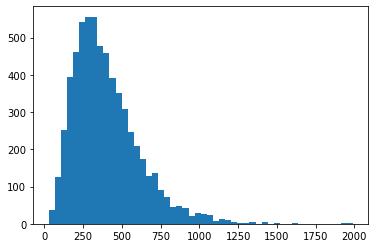

In [43]:
plt.hist(ns, bins=50)
plt.show()

In [48]:
print(sum(ns))
print(min(ns))
print(max(ns))

2501084
27
1990


- 억까당하고 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?

In [18]:
spell_power_counts[:10], attack_power_counts[:10]

(array([14, 27, 19, 40, 23, 10, 19, 27, 23, 17]),
 array([13, 18, 10, 22, 22,  9, 23, 21, 17, 20]))

In [19]:
gaps = spell_power_counts - attack_power_counts

In [20]:
print(len(gaps))

6193


In [21]:
gaps[:10]

array([ 1,  9,  9, 18,  1,  1, -4,  6,  6, -3])

In [22]:
sum(gaps)

18015

`-` 에디 마력 2줄을 3번 획득한 후 공격력 2줄을 획득한 사람은 50000명 중 6193명이다

`-` 이 6193명의 경우 총 2501084번 잠재능력을 재설정 했으며 첫 번째 줄에서 마력이 공격력보다 18015번 더 등장했다

`-` 이 수치가 일반적인 경우와 비교했을 때 이상치인지 확인하겠다

## 일반적인 경우

In [49]:
# 궁금증: 일반적인 상황에선 에디 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?
threshold = 0
size = 50000
ns, spell_power_counts, attack_power_counts = record_tests(threshold=threshold, size=size)

- 공격력 2줄을 뽑기위해 시도한 횟수

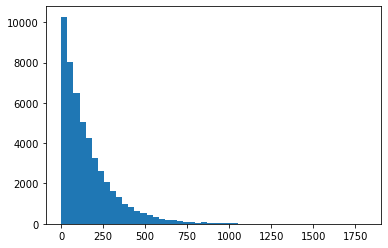

In [50]:
plt.hist(ns, bins=50)
plt.show()

In [51]:
print(sum(ns))
print(min(ns))
print(max(ns))

7999376
1
1812


- 일반적인 상황에선 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?

In [52]:
gaps = spell_power_counts - attack_power_counts
print(len(gaps))

50000


In [53]:
sum(gaps)

-323

`-` 공격력 2줄을 뽑았을 때 첫 번째 줄에서 마력보다 공격력이 323번 더 등장했다

`-` 50000명이 총 7999376번 잠재능력을 재설정 했으며 첫 번째 줄에서 마력보다 공격력이 323번 더 등장했다

`-` 첫 번째 줄에서 공격력, 마력이 각각 등장할 확률 $p= 0.04878$이다

`-` $n=7999376$이므로 이항분포 $B(7999376, 0.04878)$를 생각할 수 있다

`-` 이는 한 번의 시행마다 공격력을 얻을 확률이 0.04878인 잠재능력 재설정을 7999376번 했을 때 등장한 공격력 옵션의 개수임을 뜻한다 (마력도 동일함)

`-` 그런데 표본을 수집할 때 $n=7999376$을 처음부터 정한 것은 아니며 여기서 $n$은 확률 변수의 실현치이다 (공격력 2줄을 50000번 얻을때까지 잠재능력 재설정을 한 횟수)

`-` 왜냐하면 7999376번 잠재능력을 설정한게 아니라 50000명의 사람들이 각각 공격력 2줄이 나올때까지 잠재능력을 재설정한 결과를 취합한 것이기 때문이다

`-` 항상 잠재능력 재설정의 마지막 결과는 공격력 2줄(공격력 1줄은 당연히 포함)이므로 여기서 첫 번째 줄에서 공격력이 등장한 횟수의 분포는 정확하게 이항 분포를 따르지는 않는다

`-` 하지만 표본 크기가 7999376로 매우 크므로 이항 분포로 근사 가능하다

`-` 공격력 2줄을 50000번 얻을 때까지 잠재능력 재설정을 하여 총 7999376번 잠재능력을 재설정 했을 때 첫 번째 줄에서 공격력이 등장한 횟수를 $X$라 하자

`-` 확률 변수 $X$는 근사적으로 이항 분포 $B(7999376, 0.04878)$를 따르며 마력의 경우도 이와 동일하며 확률 변수 $Y$라 칭하자 

`-` $np=7999376\times0.04878=390209$로 충분히 크므로 확률 변수 $X$와 $Y$는 $N(np, np(1-p))$로 근사 가능하다

`-` 이때 확률 변수 $W=Y-X$는 정규분포의 성질에 의해 $N(0, 2np(1-p))$를 따른다

`-` 정규분포에서 $95\%$의 데이터는 $(\mu-2\sigma, \mu+2\sigma)$에 존재하는데 이를 계산하면 $(-1723, 1723)$이다

`-` 즉, -323이란 값은 충분히 등장할 수 있는 수치이다

`-` 위에서는 $n$도 2501084로 더 작으며 확률 변수 실현치인 18015도 $(-1723, 1723)$ 구간을 벗어났으니 편향된 값이라 볼 수 있다

`-` 결론: 억까인 상황에 대해서는 첫 줄에 마력이 공격력보다 더 많이 등장한다

## 최소한의 억까?

`-` 한편, 억까의 기준이 너무 높다고 생각할 수 있다

`-` 위에서 정한 억까의 기준은 에디 마력 2줄을 3번 획득한 후 공격력 2줄을 획득한 경우이다

`-` 억까의 기준을 가장 약하게 정한다면 에디 마력 2줄을 1번 획득한 후 공격력 2줄을 획득한 경우로 정의할 수 있다

In [57]:
# 궁금증: 최소한의 억까를 당하고 에디 공격력 2줄을 뽑았을 때 첫 줄 옵션에서 공격력보다 마력이 더 많이 등장했을까?
threshold = 1
size = 50000
ns, spell_power_counts, attack_power_counts = record_tests(threshold=threshold, size=size)

In [62]:
print(sum(ns))
print(min(ns))
print(max(ns))

6030774
2
2210


In [63]:
gaps = spell_power_counts - attack_power_counts

In [64]:
print(len(gaps))

24903


In [65]:
sum(gaps)

26357

`-` 에디 마력 2줄을 1번 획득한 후 공격력 2줄을 획득한 사람은 50000명 중 24903명이다

`-` 이 24903명의 경우 총 6030774번 잠재능력을 재설정 했으며 첫 번째 줄에서 마력이 공격력보다 26357번 더 등장했다

`-` 이는 일반적인 기준과 비교했을 때 이상치로 취급된다

`-` 즉, 억까의 기준이 낮든 높든 편향되어 있으면 편향된 데이터를 얻게 된다

`-` 애초에 50000명 중 24903명의 데이터만 편향을 가지고 취합했으므로 당연한 결과이다 